<a href="https://colab.research.google.com/github/NguyenThinhDatEng/Deep_Learning/blob/master/Meachine_Learning/Linear_regression/Gradient_Descent/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# generate data
# numOfPoints = 30
# noise = np.random.normal(0,1,numOfPoints).reshape(-1, 1)
# x = np.linspace(30, 100, numOfPoints).reshape(-1, 1)
# N = x.shape[0]
# y = 15 * x + 8 + 20 * noise
# plt.scatter(x, y)

# take csv file from github
url = 'https://raw.githubusercontent.com/NguyenThinhDatEng/Deep_Learning/master/Meachine_Learning/Gradient_Descent/data_linear.csv'
data = pd.read_csv(url).values
# algo
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x,y)
plt.xlabel('m^2')
plt.ylabel('price')

x = np.hstack((np.ones((N, 1)), x))

w = np.array ([0., 1.]).reshape(-1, 1)

numOfIteration = 100
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.000001 # learning rate
for i in range(1, numOfIteration):
  r = np.dot(x, w) - y
  cost[i] = 0.5 * np.sum(r * r)
  w[0] -= learning_rate * np.sum(r)
  # correct the shape dimension
  w[1] -= learning_rate * np.sum(np.multiply(r, x[:, 1].reshape(-1, 1)))
  print(cost[i])
predict = np.dot(x, w)
plt.plot((x[0][1], x[N - 1][1]), (predict[0], predict[N - 1]), 'r')
plt.show()

In [10]:
# run model
x1 = 50
y1 = w[0] + w[1] * x1
print('The price for 50 m^2 is: ', y1)

The price for 50 m^2 is:  [755.68795083]


In [11]:
# save w with numpy.save(), format '.npy'
np.save('weight.npy', w)
# read file '.npy' contains weight parameter
w = np.load('weight.npy')

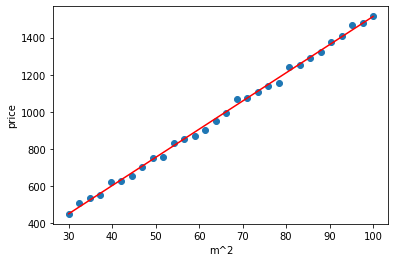

In [13]:
# LinearRegression with sklearn libary
from sklearn.linear_model import LinearRegression

# take csv file from github
url = 'https://raw.githubusercontent.com/NguyenThinhDatEng/Deep_Learning/master/Meachine_Learning/Gradient_Descent/data_linear.csv'
data = pd.read_csv(url).values
# algo
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

plt.scatter(x, y)
plt.xlabel('m^2')
plt.ylabel('price')

# create linear regression model
lrg = LinearRegression()
# train
lrg.fit(x, y)
# predict
y_pred = lrg.predict(x)

plt.plot((x[0], x[-1]), (y_pred[0], y_pred[-1]), 'r')
plt.show()

In [14]:
# save many parameters with numpy.savez(), format '.npz'
np.savez('w2.npz', a=lrg.intercept_, b=lrg.coef_)
# get back the parameters in file .npz
k = np.load('w2.npz')
lrg.intercept_ = k['a']
lrg.coef_ = k['b']